Coefficient - 1.0023322569070685


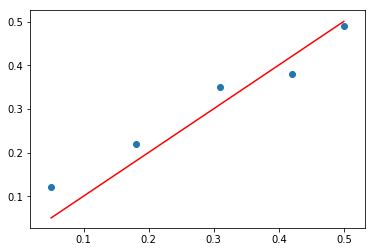

In [1]:
%matplotlib inline
import numpy as np
# solve directly

from matplotlib import pyplot
data = np.array([
            [0.05, 0.12],
            [0.18, 0.22],
            [0.31, 0.35],
            [0.42, 0.38],
            [0.5, 0.49],
            ])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# linear least squares
# np.linalg.inv -- обратная матрица
# np.dot(a,b) -- перемножает матрицы
b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y) #  inv(X.T.dot(X)).dot(X.T).dot(y) 
print("Coefficient -", b[0])

# построим график, используя данные коэффициенты
yhat = np.dot(X, b)

# посмотрим на данные и получившиеся результаты
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()


# QR-Decomposition

One of the key benefits of using QR Decomposition over other methods for solving linear least squares is that it is more numerically stable

For a square matrix A the QR Decomposition converts A into the product of an orthogonal matrix Q (i.e. QTQ=I) and an upper triangular matrix R. Hence:

A=QR

The method of Householder Reflections, which is known to be more numerically stable the the alternative Gramm-Schmidt method. 

1. Easy solve with internal function in NumPy

In [2]:
Q, R = np.linalg.qr(X)
b = np.linalg.inv(R).dot(Q.T).dot(y)
print (b[0])



1.0023322569070687


In [74]:
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

# A = scipy.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])  # From the Wikipedia Article on QR Decomposition

A = scipy.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])  # From the Wikipedia Article on QR Decomposition

# A = scipy.array([[63,41,-88],[42,60,51],[0,-28,56],[126,82,-71]])  # From the Wikipedia Article on QR Decomposition


# A = scipy.array([[1,1,0],[2,-3,0],[8,4,-4]])  # From the Wikipedia Article on QR Decomposition

# A = scipy.array([[2, -1, 5],[3, 2, -5],[1, 1, -2]])
# A = scipy.array([[1, 6, 2, 9], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]]) 

Q, R = scipy.linalg.qr(A)

print (A)

print (Q)

print (R)

[[ 1 -1  2  2  7]
 [-1  2  1 -1  4]
 [ 2  1  3  2  2]
 [ 2 -1  2  1  5]]
[[-0.31622777  0.28342172  0.82268766 -0.37796447]
 [ 0.31622777 -0.68830988  0.53232731  0.37796447]
 [-0.63245553 -0.64782106 -0.19357357 -0.37796447]
 [-0.63245553  0.16195527  0.04839339  0.75592895]]
[[-3.16227766  0.9486833  -3.47850543 -2.84604989 -5.37587202]
 [ 0.         -2.46981781 -1.74101911  0.12146645 -1.25515331]
 [ 0.          0.          1.69376871  0.77429427  7.7429427 ]
 [ 0.          0.          0.         -1.13389342  1.88982237]]


2. Hard-core solution of the problem

Web resourses, that i have been used:
 > https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy
 > http://mathfaculty.fullerton.edu/mathews/n2003/householder/HouseholderMod/Links/HouseholderMod_lnk_2.html
 

In [75]:
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def norm(x):
    """Return the Euclidean norm of the vector x."""
    return math.sqrt(sum([x_i**2 for x_i in x]))

def generate_v(A,count):
    
    A_last = A
    if count > 0:
        A = A[count:,count:]  
    
    e = np.zeros((len(A[:,:1]), 1))
    e[0]=1
#     if count ==0 and A_last.shape[0] != A_last.shape[1]:
#         v = A[:,:1] - sign(A_last[count,count])*np.dot(norm(A[:,:1]),e)
#     else:
    v = A[:,:1] + sign(A_last[count,count])*np.dot(norm(A[:,:1]),e)
    
    H = np.eye(len(v),len(v)) - 2 * (np.dot(v,v.transpose())/np.dot(v.transpose(),v))
    

    A_new = np.dot (H, A)
    
    H_last = np.zeros((A_last.shape[0],A_last.shape[0]))
    
    for i in range(count):
            H_last[i,i] = 1
    
    for i in range(H_last.shape[0]):
        for j in range(H_last.shape[1]):
            if i >= count and j >= count:
                H_last[i,j] = H[i-count,j-count]

    if count >= 1:   
        for i in range(A_last.shape[0]):
            for j in range(A_last.shape[1]):
                if i != 0 and j != 0:
                    A_last[i,j] = A_new[i-count,j-count]
            
        return (v,np.around(H_last,4),np.around(A_last,4))        
    else:
        return (v,np.around(H_last,4),np.around(A_new,4))
    
    
# A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])
# A = np.array([[1, 6, 2, 9], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
# A = np.array([[2,-2,18],[2,1,0],[1,2,0]])
# A = np.array([[63,41,-88],[42,60,51],[0,-28,56],[126,82,-71]])

# A = np.array([[2,1,2],[2,2,1],[1,2,2]]) # работает


#----------
# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])
# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])

# A = np.array([[2, -1, 5],[3, 2, -5],[1, 1, -2]])

# A = np.array([[1, 1, ],[3, 2, -5],[1, 1, -2]])

A = np.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
count = 0

Q = np.eye(len(A),len(A))
R = np.eye(len(A),len(A))
A_last = A
while np.allclose(A, np.triu(A)) != True and count < A.shape[1]-1:
    v, H, A = generate_v(A,count)
    Q = np.dot (Q,H) 
    count += 1
R = np.dot (np.transpose(Q),A_last)
print ('A_last',A_last)
print ('Q:',Q)
print ('R:', np.around(R,2))


A_last [[ 1 -1  2  2]
 [-1  2  1 -1]
 [ 2  1  3  2]
 [ 2 -1  2  1]]
Q: [[-0.3162      0.28345426  0.82270588 -0.37801552]
 [ 0.3162     -0.68823538  0.53233091  0.37794706]
 [-0.6325     -0.6477914  -0.19358843 -0.37794513]
 [-0.6325      0.1620086   0.04832795  0.75589771]]
R: [[-3.16  0.95 -3.48 -2.85]
 [ 0.   -2.47 -1.74  0.12]
 [-0.    0.    1.69  0.77]
 [-0.    0.   -0.   -1.13]]


In [5]:
# H_1 = np.eye(len(A[:,:1]),len(A[:,:1])) - 2 * (np.dot(v_1,v_1.transpose())/np.dot(v_1.transpose(),v_1)) #Householder matrix


A_1 = np.dot (H_1, A)
A_2 = A_1[1:,1:]

e = np.zeros((len(A_2[:,:1]), 1))
e[0]=1


v_2 = A_2[:,:1] - sign(A_2[1,1]) * np.dot(norm(A_2[:,:1]),e) # определение знака не забыть дописать
# v_2 = np.sum(A_2[:,:1]*A_2[:,:1])
             
v_2

NameError: name 'H_1' is not defined

In [ ]:
# 6 step
H_2 = np.eye(len(A_2[:,:1]),len(A_2[:,:1])) - 2 * (np.dot(v_2,v_2.transpose())/np.dot(v_2.transpose(),v_2)) 
H_2

In [ ]:
A_2 = np.dot(H_2,A_2) #7, обозначения необходимо сменить
# print (A_2)

A_2_new = np.zeros((A_1.shape[0],A_1.shape[1]))
# print (A_2_new)

for i in range(A_1.shape[0]):
    for j in range(A_1.shape[1]):
        if i < 1 or j < 1:
            A_2_new[i,j] = A_1[i,j] 
        else:
            A_2_new[i,j] = A_2[i-1,j-1]
#             print ('No',A_2[i-1,j-1])
print (A_2_new)

H_2_new = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        if i < 1 or j < 1:
            if i == j:
                H_2_new [i,j] = 1
            else:
                H_2_new [i,j] = 0
#             print (A_1[i,j])
        else:
            H_2_new [i,j] = H_2[i-1,j-1]
#             print ('No',A_2[i-1,j-1])
print (H_2_new)       

In [ ]:
for i in A_2_new:
    if i.sum()==0:
        print (i)
# A_2_new_3_3 = A_2_new

# заменить на более умную функцию
# for i in range(A_1.shape[0]):
#     for j in range(A_1.shape[1]):
#         if i < 3 or j < 3:
#             A_2_new_3_3[i,j] = A_1[i,j]

A_2_new_3_3 = np.array([[2, 3, 2], [0, 5, -2], [0, 0, 4]])
A_2_new_3_3

In [ ]:
Q = np.dot(H_1,H_2_new)# H_1*H_2

In [ ]:
Q

# BackUps

In [ ]:
from math import sqrt

def mult_matrix(M, N):
    """Multiply square matrices of same dimension M and N"""
    # Converts N into a list of tuples of columns                                                                     
    tuple_N = zip(*N)

    # Nested list comprehension to calculate matrix multiplication                                                    
    return [[sum(el_m * el_n for el_m, el_n in zip(row_m, col_n)) for col_n in tuple_N] for row_m in M]

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


def trans_matrix(M):
    """Take the transpose of a matrix."""
    n = len(M)
    return [[ M[i][j] for i in range(n)] for j in range(n)]

def norm(x):
    """Return the Euclidean norm of the vector x."""
    return sqrt(sum([x_i**2 for x_i in x]))

def Q_i(Q_min, i, j, k):
    """Construct the Q_t matrix by left-top padding the matrix Q                                                      
    with elements from the identity matrix."""
    if i < k or j < k:
        return float(i == j)
    else:
        return Q_min[i-k][j-k]

def householder(A):
    """Performs a Householder Reflections based QR Decomposition of the                                               
    matrix A. The function returns Q, an orthogonal matrix and R, an                                                  
    upper triangular matrix such that A = QR."""
    n = len(A)

    # Set R equal to A, and create Q as a zero matrix of the same size
    R = A
    Q = [[0.0] * n for i in range(n)]  # можно переписать на numpy !!!!!!!!!!!

    # The Householder procedure
    for k in range(n-1):  # We don't perform the procedure on a 1x1 matrix, so we reduce the index by 1
        # Create identity matrix of same size as A                                                                    
        I = [[float(i == j) for i in range(n)] for j in range(n)] # можно переписать на numpy !!!!!!!!!!!

        # Create the vectors x, e and the scalar alpha
        
        x = [row[k] for row in R[k:]]
        e = [row[k] for row in I[k:]]
        alpha = -sign(x[0]) * norm(x)

        # Using anonymous functions, we create u and v
        u = map(lambda p,q: p + alpha * q, x, e)
        norm_u = norm(u)
        v = map(lambda p: p/norm_u, u)

        # Create the Q minor matrix
        Q_min = [ [float(i==j) - 2.0 * v[i] * v[j] for i in range(n-k)] for j in range(n-k) ]

        # "Pad out" the Q minor matrix with elements from the identity
        Q_t = [[ Q_i(Q_min,i,j,k) for i in range(n)] for j in range(n)]

        # If this is the first run through, right multiply by A,
        # else right multiply by Q
        if k == 0:
            Q = Q_t
            R = mult_matrix(Q_t,A)
        else:
            Q = mult_matrix(Q_t,Q)
            R = mult_matrix(Q_t,R)

    # Since Q is defined as the product of transposes of Q_t,
    # we need to take the transpose upon returning it
    return trans_matrix(Q), R

A = [[12, -51, 4], [6, 167, -68], [-4, 24, -41]]
Q, R = householder(A)

print ("A:",A)
# pprint(A)

print ("Q:",Q)
pprint(Q)

print ("R:",R)


In [ ]:
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
    
def generate_e(A):
    e = np.zeros((len(A[:,:1]), 1))
    e[0]=1
    return e

def generate_v(A):
    v = A[:,:1] - sign(A[1,1])*np.dot(norm(A[:,:1]),e)
    
def norm(x):
    """Return the Euclidean norm of the vector x."""
    return math.sqrt(sum([x_i**2 for x_i in x]))

def generate_v(A,count):
    e = generate_e(A)
    v = generate_v(A)
#     v = A[:,:1] - sign(A[1,1])*np.dot(norm(A[:,:1]),e)
    H = np.eye(len(A[:,:1]),len(A[:,:1])) - 2 * (np.dot(v,v.transpose())/np.dot(v.transpose(),v))
    
    A_new = np.dot (H, A)
    if count > 1:
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                if i < 1 or j < 1:
                    A_new[i,j] = A[i,j] 
                else:
                    pass

    return (v,H,A_new)
    
    
A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])

# v_1 = A[:,:1] - sign(A[1,1])*np.dot(norm(A[:,:1]),e)  # можем запихнуть в функцию


v_1, H_1, A_1 = generate_v(A,1)


v_2, H_2, A_2 = generate_v(A_1[1:,1:],2)

print (A_2)

# Work

In [ ]:
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def norm(x):
    """Return the Euclidean norm of the vector x."""
    return math.sqrt(sum([x_i**2 for x_i in x]))

def generate_v(A,count):
    
    if count > 1:
        A_last = A
        A = A[1:,1:]
    
    e = np.zeros((len(A[:,:1]), 1))
    e[0]=1
    v = A[:,:1] - sign(A[1,1])*np.dot(norm(A[:,:1]),e)
    H = np.eye(len(A[:,:1]),len(A[:,:1])) - 2 * (np.dot(v,v.transpose())/np.dot(v.transpose(),v))
    
    A_new = np.dot (H, A)
    if count > 1:
        H_last = np.zeros((4,4))
        H_last[0,0] = 1
        
        for i in range(H_last.shape[0]):
            for j in range(H_last.shape[1]):
                if i != 0 and j != 0:
                    H_last[i,j] = H[i-1,j-1]
        for i in range(A_last.shape[0]):
            for j in range(A_last.shape[1]):
                if i != 0 and j != 0:

                    A_last[i,j] = A_new[i-1,j-1]
            
#         A_last = A_last[~np.all(A_last == 0, axis=1)]
        return (v,H_last,A_last)        
    else:
        return (v,H,A_new)
    
    
A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])



v_1, H_1, A_1 = generate_v(A,1)

print (A_1)
print (H_1)
v_2, H_2, A_2 = generate_v(A_1,2)
print (A_2)
print (H_2)
A_last = A_2
A_last = A_last[~np.all(A_last == 0, axis=1)]
print (A_last)

print (H_1)
print (H_2)
Q = np.dot(H_1,H_2)
print (Q)

# 4x4 Q правильно выдаёт

In [ ]:
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def norm(x):
    """Return the Euclidean norm of the vector x."""
    return math.sqrt(sum([x_i**2 for x_i in x]))

def generate_v(A,count):
    
    A_last = A
#     print ('A_last pered cikle', A_last)
    if count > 0:
        A = A[count:,count:]
#     print ('A_last posle cikle', A_last)    
    e = np.zeros((len(A[:,:1]), 1))
    e[0]=1
#     print (v)
    v = A[:,:1] + sign(A[1,1])*np.dot(norm(A[:,:1]),e)
    
    H = np.eye(len(v),len(v)) - 2 * (np.dot(v,v.transpose())/np.dot(v.transpose(),v))
    

    A_new = np.dot (H, A)
    
    H_last = np.zeros((4,4))
    
    for i in range(count):
            H_last[i,i] = 1
#     print (H_last)
    
    for i in range(H_last.shape[0]):
        for j in range(H_last.shape[1]):
            if i >= count and j >= count:
#                 print (i,j)
#                 print (H_last[i,j])
#                 print (H[i-count,j-count])
                H_last[i,j] = H[i-count,j-count]
#         print (H_last)
    if count >= 1:   
        for i in range(A_last.shape[0]):
            for j in range(A_last.shape[1]):
                if i != 0 and j != 0:

                    A_last[i,j] = A_new[i-count,j-count]
            
        return (v,np.around(H_last,4),np.around(A_last,4))        
    else:
        return (v,np.around(H_last,4),np.around(A_new,4))
    
    
# A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])

# A = np.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
# A = np.array([[2,-2,18],[2,1,0],[1,2,0]])
# A = np.array([[63,41,-88],[42,60,51],[0,-28,56],[126,82,-71]])

# A = np.array([[2,1,2],[2,2,1],[1,2,2]]) # работает


#----------
# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])


# v_1, H_1, A_1 = generate_v(A,1)

# # print (v_1)
# print (np.around(A_1,4))
# print (H_1)

# v_2, H_2, A_2 = generate_v(A_1,2)

# print (np.around(A_2,4)) # R-matrix
# # print (H_2)
# print ('check:', np.allclose(A_2, np.triu(A_2))) # check if upper triangular

# Q = np.dot(H_1,H_2)
# print (Q)


# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])
A = np.array([[2, -1, 5],[3, 2, -5],[1, 1, -2]])



# A = np.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
count = 0

Q = np.eye(len(A),len(A))
while np.allclose(A, np.triu(A)) != True and count < A.shape[1]-1:
    v, H, A = generate_v(A,count)
    Q = np.dot (Q,H)
    count += 1
#     print ('Q:',Q)
#     print ('A after step:', A)
    print (count)
print ('Q:',Q)
print ('A after step:', A)
# print (A)
# print (Q)

# v_3, H_3, A_3 = generate_v(A_2,2)

# print (np.around(A_3,4))
# print (np.around(H_3,4))



# v_4, H_4, A_4 = generate_v(A_3,2)

# print (np.around(A_4,4))
# print (np.around(H_4,4))
# A_last = A_2
# A_last = A_last[~np.all(A_last == 0, axis=1)]
# print (A_last)

# # print (H_1)
# # print (H_2)
# Q = np.dot(H_1,H_2)
# print (Q)

In [ ]:
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def znak(count):
    if count == 0:
        return (1)
    if count == 1:
        return (-1)
    if count == 2:
        return (1)
def norm(x):
    """Return the Euclidean norm of the vector x."""
    return math.sqrt(sum([x_i**2 for x_i in x]))

def generate_v(A,count):
    
    A_last = A
#     print ('A_last pered cikle', A_last)
    if count > 0:
        A = A[count:,count:]  
    
    e = np.zeros((len(A[:,:1]), 1))
    e[0]=1
    v = A[:,:1] + znak(count)*sign(A[1,1])*np.dot(norm(A[:,:1]),e)
    
    H = np.eye(len(v),len(v)) - 2 * (np.dot(v,v.transpose())/np.dot(v.transpose(),v))
    

    A_new = np.dot (H, A)
    
    H_last = np.zeros((A_last.shape[0],A_last.shape[1]))
    
    for i in range(count):
            H_last[i,i] = 1
    
    for i in range(H_last.shape[0]):
        for j in range(H_last.shape[1]):
            if i >= count and j >= count:
#                 print (i,j)
#                 print (H_last[i,j])
#                 print (H[i-count,j-count])
                H_last[i,j] = H[i-count,j-count]
#         print (H_last)
    if count >= 1:   
        for i in range(A_last.shape[0]):
            for j in range(A_last.shape[1]):
                if i != 0 and j != 0:

                    A_last[i,j] = A_new[i-count,j-count]
            
        return (v,np.around(H_last,4),np.around(A_last,4))        
    else:
        return (v,np.around(H_last,4),np.around(A_new,4))
    
    
# A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2],[1, -1, 0]])

# A = np.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
# A = np.array([[2,-2,18],[2,1,0],[1,2,0]])
# A = np.array([[63,41,-88],[42,60,51],[0,-28,56],[126,82,-71]])

# A = np.array([[2,1,2],[2,2,1],[1,2,2]]) # работает


#----------
# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])
# A = np.array([[1,1,0],[2,-3,0],[8,4,-4]])

A = np.array([[2, -1, 5],[3, 2, -5],[1, 1, -2]])

# A = np.array([[1, 1, ],[3, 2, -5],[1, 1, -2]])


# A = np.array([[1, -1, 2, 2], [-1, 2, 1, -1], [2, 1, 3, 2],[2, -1, 2, 1]])
count = 0

Q = np.eye(len(A),len(A))
print (A)
while np.allclose(A, np.triu(A)) != True and count < A.shape[1]-1:
    v, H, A = generate_v(A,count)
    Q = np.dot (Q,H)
    count += 1
#     print ('Q:',Q)
#     print ('A after step:', A)
    print (count)
print ('Q:',Q)
print ('A after step:', A)
